In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os
from glob import iglob

/Users/mikesivley/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Load all structural p-values across both analyses
df = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/specialK_analysis_2016-05-06/consurf/score_K_summary.txt",delimiter='\t')

In [3]:
print "Number of structures evaluated:"
print len(df)
print "\nProportion with nominally significant unweighted p-values:"
print "Permutation:  (%4d) %.4f"%(len(df[df["Kp"]<0.01]),len(df[df["Kp"]<0.01]) / float(len(df)))
print "Perm Z-Score: (%4d) %.4f"%(len(df[df["Kzp"]<0.01]),len(df[df["Kzp"]<0.01]) / float(len(df)))
print '\nNumber with nominally significant weighted p-values:'
print "Permutation:  (%4d) %.4f"%(len(df[df["wKp"]<0.01]),len(df[df["wKp"]<0.01]) / float(len(df)))
print "Perm Z-Score: (%4d) %.4f"%(len(df[df["wKzp"]<0.01]),len(df[df["wKzp"]<0.01]) / float(len(df)))

Number of structures evaluated:
2886

Proportion with nominally significant unweighted p-values:
Permutation:  (2336) 0.8094
Perm Z-Score: (2494) 0.8642

Number with nominally significant weighted p-values:
Permutation:  ( 419) 0.1452
Perm Z-Score: ( 399) 0.1383


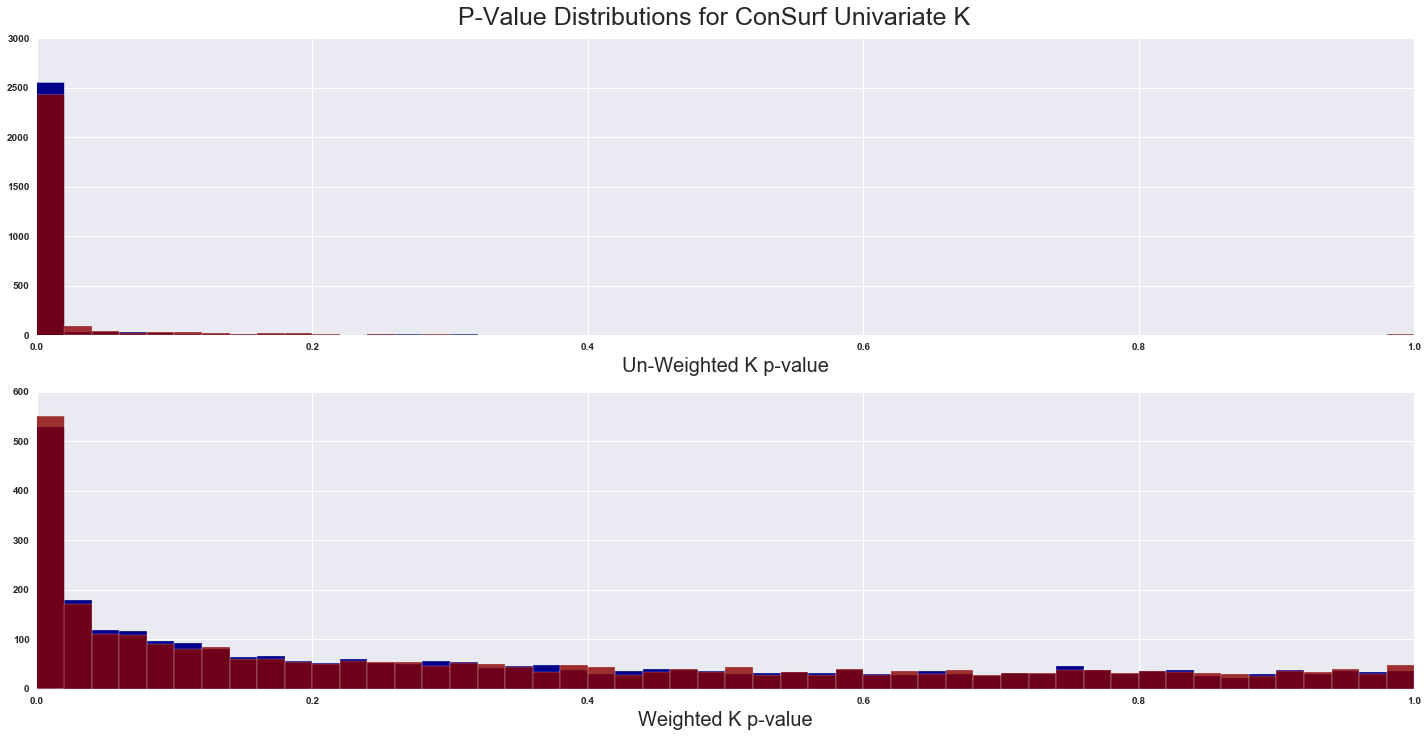

In [26]:
# P-Value Distributions
fig,ax = plt.subplots(2,1,figsize=(20,10))
plt.suptitle("P-Value Distributions for ConSurf Univariate K",fontsize=25,y=1.02)
ax[0].set_xlabel("Un-Weighted K p-value",fontsize=20)
ax[0].hist(df["Kzp"],bins=np.arange(0,1.02,0.02),color="darkblue")
ax[0].hist(df["Kp"],bins=np.arange(0,1.02,0.02),color="darkred",alpha=0.8)
ax[1].set_xlabel("Weighted K p-value",fontsize=20)
ax[1].hist(df["wKzp"],bins=np.arange(0,1.02,0.02),color="darkblue")
ax[1].hist(df["wKp"],bins=np.arange(0,1.02,0.02),color="darkred",alpha=0.8)
plt.tight_layout()
plt.show()

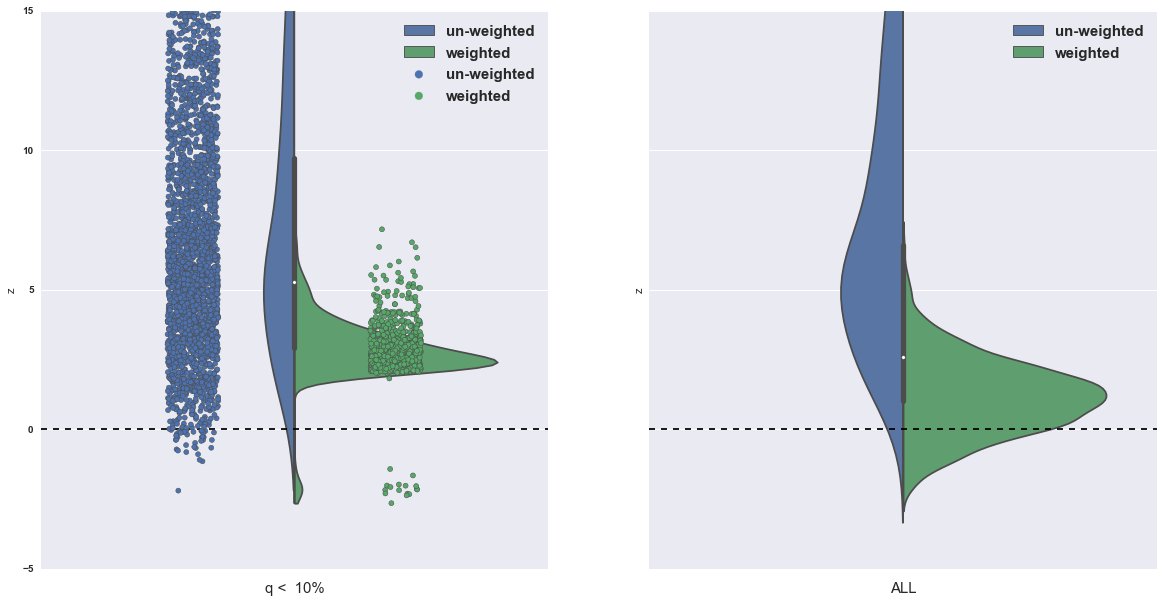

In [32]:
dfu = pd.DataFrame(df[["Kp","Kz"]].values,columns=["p","z"])
dfu['q'] = estimate(dfu["p"].values)
dfu["w"] = "un-weighted"
dfw = pd.DataFrame(df[["wKp","wKz"]].values,columns=["p","z"])
dfw['w'] = "weighted"
dfw['q'] = estimate(dfw["p"].values)
dfv = pd.concat((dfu,dfw))
dfv['dummy'] = ""

fig,ax = plt.subplots(1,2,figsize=(20,10),sharey=True)
dfv1 = dfv[dfv["q"]<THRESH]
split = (dfv1["w"]=="weighted").sum() > 0
sns.violinplot(x='dummy',y="z",hue='w',data=dfv1,ax=ax[0],orient='v',split=split,cut=0)
sns.stripplot( x='dummy',y="z",hue='w',data=dfv1,ax=ax[0],orient='v',split=True,jitter=True,lw=0.5)
sns.violinplot(x='dummy',y="z",hue='w',data=dfv,ax=ax[1],cut=1,orient='v',split=True)
ax[0].set_xlabel("q <  %.0f%%"%(THRESH*100),fontsize=15)
ax[1].set_xlabel("ALL",fontsize=15)
ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)
plt.ylim([-5,15])
ax[0].axhline(0.,ls='dashed',c='black')
ax[1].axhline(0.,ls='dashed',c='black')
plt.show()

In [31]:
from qvalue import estimate
THRESH = 0.1

print "Proteins passing an FDR of %.0f%% for the unweighted analysis"%(THRESH*100)
print "Permutation: %4d"%(estimate(df["Kp"].values)<THRESH).sum()
print "Z-Score:     %4d"%(estimate(df["Kzp"].values)<THRESH).sum()

print "\nProteins passing an FDR of %.0f%% for the weighted analysis"%(THRESH*100)
print "Permutation: %4d"%(estimate(df["wKp"].values)<THRESH).sum()
print "Z-Score:     %4d"%(estimate(df.ix[~df["wKzp"].isnull(),"wKzp"].values)<THRESH).sum()

Proteins passing an FDR of 10% for the unweighted analysis
Permutation: 2886
Z-Score:     2886

Proteins passing an FDR of 10% for the weighted analysis
Permutation:  723
Z-Score:      735


In [8]:
tdf = df[df["Kp"]<.01]
print "%.2f%%"%(100.*len(tdf)/len(df))
print ''
print np.mean(tdf["T"])
print np.std(tdf["T"])
print ''
tdf = df[df["wKp"]<.01]
print "%.2f%%"%(100.*len(tdf)/len(df))
print ''
print np.mean(tdf["wT"])
print np.std(tdf["wT"])

80.94%

10.4255136986
2.6837473309

14.52%

10.9116945107
4.50238141625


ValueError: The first argument of bincount must be non-negative

/Users/mikesivley/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


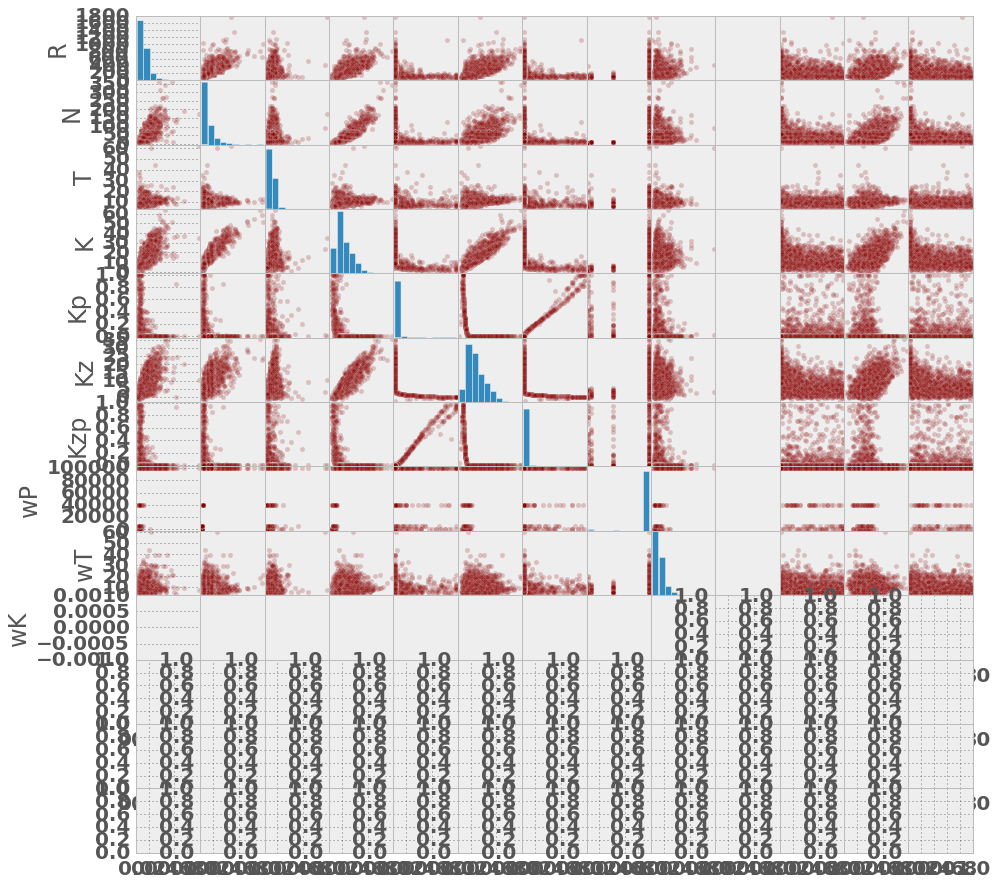

In [9]:
# Correlation matrix of column values
font = {'family' : 'helvetica',
        'weight' : 'bold',
        'size'   : 20}
mpl.rc('font', **font)
tdf = df.dropna(how='all',axis=1).drop("P",axis=1)
axes = pd.tools.plotting.scatter_matrix(tdf,alpha=0.2,figsize=(15,15),c="darkred",grid="Off",s=100)
plt.show()

In [ ]:
# Correlation matrix of column values for significant proteins
font = {'family' : 'helvetica',
        'weight' : 'bold',
        'size'   : 20}
mpl.rc('font', **font)
tdf = df[df["Kp"]<0.01].dropna(how='all',axis=1).drop("P",axis=1)
axes = pd.tools.plotting.scatter_matrix(tdf,alpha=0.2,figsize=(15,15),c="darkred",grid="Off",s=100)
plt.show()

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(19,8))
ax[0].hist(df["Kp"].values,bins=np.arange(0,1,0.05),color="darkred")
ax[1].hist(df["wKp"].values,bins=np.arange(0,1,0.05),color="darkred")
plt.show()

In [ ]:
plt.figure(figsize=(20,7))
plt.hist(tdf["T"].values,bins=50,color="darkred")
plt.show()

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].scatter(df["Kp"].values,df["Kzp"].values)
ax[1].scatter(df["wKp"].values,df["wKzp"].values)
ax[0].set_xlim([0,1])
ax[0].set_ylim([0,1])
ax[1].set_xlim([0,1])
ax[1].set_ylim([0,1])
ax[0].plot([0,1],[0,1],ls="dashed",lw=3)
ax[1].plot([0,1],[0,1],ls="dashed",lw=3)
plt.show()

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(7,7))
ax.scatter(-np.log10(df["Kp"].values),-np.log10(df["Kzp"].values))
ax.plot([0,4],[0,4],ls="dashed",lw=3)
ax.set_xlabel("Permutation P")
ax.set_ylabel("Permutation Z-score-derived P-Value")
plt.show()

In [ ]:
# Permutation p-value distributions
fig,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].hist(df["Kp"],bins=100, color="mediumblue")
ax[1].hist(df["Kzp"],bins=100,color="mediumblue")
plt.show()

In [ ]:
# All
df.hist(bins=50,figsize=(20,15),color="darkred")
plt.show()

In [ ]:
# Clustered
df[df["Kz"]>0].hist(bins=50,figsize=(15,15),color="darkred")
plt.show()

In [ ]:
# Dispersed
df[df["Kz"]<0].hist(bins=50,figsize=(15,15),color="darkred")
plt.show()

In [ ]:
# Problems
df.ix[(df["wKzp"]>0.3165) & (df["wKzp"]<0.3185)].hist(bins=100,figsize=(15,15),color="darkred",layout=(2,7))
plt.show()

In [ ]:
print "How many of my previous 11 top-scoring structures have completed the analysis?\n"
print df.ix[df["structid"].isin(["4BHW","2NPP","4NM6","4JSP","2OVQ","3ETO","3GT8","2RD0","2Y1M","2SHP","1RJB"]),["structid","chain","Kz","Kp","wKz","wKp"]]

In [ ]:
lower = ["1d5r","2shp","2rd0","4mzr","2ovq","2ii5","2npp","3iz0","2lwi","1dc2"]
upper = [s.upper() for s in lower]
print "Them!"
print df.ix[df["structid"].isin(upper),["structid","chain","Kz","wKz","Kp","wKp"]]
print "Missing:",', '.join([s for s in upper if s not in df["structid"].values])


sigClustObs = (df["T"]>5)  & (df["Kz"]>0)  & (df["Kp"]<0.0001)
sigClustVal = (df["wT"]>5) & (df["wKz"]>0) & (df["wKp"]<0.0001)
sigDispObs  = (df["T"]>5)  & (df["Kz"]<0)  & (df["Kp"]<0.0001)
sigDispVal  = (df["wT"]>5) & (df["wKz"]<0) & (df["wKp"]<0.0001)

print "\nSignificantly clustered observations: %d"%sigClustObs.sum()
print df.ix[sigClustObs,["structid","chain","R","N","T","K","Kz","Kp","Kzp"]]

print "\nSignificantly clustered values: %d"%sigClustVal.sum()
print df.ix[sigClustVal,["structid","chain","R","N","wT","wK","wKz","wKp","wKzp"]]

print "\nSignificantly dispersed observations: %d"%sigDispObs.sum()
print df.ix[sigDispObs,["structid","chain","R","N","T","K","Kz","Kp","Kzp"]]

print "\nSignificantly dispersed values: %d"%sigDispVal.sum()
print df.ix[sigDispVal,["structid","chain","R","N","wT","wK","wKz","wKp","wKzp"]]

In [ ]:
# Structure / Sequence Correlation
fig,ax = plt.subplots(1,2,figsize=(20,9))
ax[0].set_title("Recurrence")
ax[0].set_xlabel("Structure")
ax[0].set_ylabel("Sequence")
ax[0].plot(-np.log10(df["recp"]),-np.log10(df["recsp"]),marker='o',linestyle='',alpha=0.7)
ax[0].set_xlim([0,5])
ax[0].set_ylim([0,5])
ax[1].set_title("SNP Clustering")
ax[1].set_xlabel("Structure")
ax[1].set_ylabel("Sequence")
ax[1].plot(-np.log10(df["snpp"]),-np.log10(df["snpsp"]),marker='o',linestyle='',alpha=0.7)
ax[1].set_xlim([0,5])
ax[1].set_ylim([0,5])
fig.suptitle("log10-P-Value Correlation Plots",fontsize=25)
plt.show()

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(20,6))
fig.suptitle("Structural P-Values",fontsize=35)
ax[0].hist(df.ix[~df["recp"].isnull(),"recp"],bins=100)
ax[1].hist(df.ix[~df["snpp"].isnull(),"snpp"],bins=100)
plt.tight_layout()
plt.show()

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(20,6))
fig.suptitle("Sequence P-Values",fontsize=35)
ax[0].hist(df.ix[~df["recsp"].isnull(),"recsp"],bins=100)
ax[1].hist(df.ix[~df["snpsp"].isnull(),"snpsp"],bins=100)
plt.tight_layout()
plt.show()

In [ ]:
def qqplot(pvec,ax=None,labels=None,color="darkblue",zoom=False):
    null = np.array([i*1./len(pvec) for i in range(1,len(pvec)+1)])
    pvec = np.sort(pvec)
    if zoom:
        null = null[null<0.05]
        pvec = pvec[null<0.05]
        if type(color)!=str:
            color = color[null<0.05]
        ax.plot([1,5.5],[1,5.5],color='grey',linestyle='-',linewidth=1)
    else:
        ax.plot([0,5.5],[0,5.5],color='grey',linestyle='-',linewidth=1)
    ax.set_xlim([0,5.5])
    ax.set_ylim([0,5.5])
    if type(color)==str:
        ax.plot(-np.log10(null),-np.log10(pvec),marker='o',linestyle='',alpha=0.7,c=color,markeredgewidth=0.0)
    else:
        ax.scatter(-np.log10(null),-np.log10(pvec),c=color,cmap="seismic")
    # Annotate the top 5 structures
    for i in range(5):
        label = tuple(labels[i])
        x,y   = -np.log10(null[i]),-np.log10(pvec[i])
        from random import randint
        ax.annotate("%s.%s"%label,xy=(x,y),textcoords="offset points",
                        ha="right",va="bottom",
                        xytext=(i*randint(-20,-10),(5-i)*randint(5,8)),
                        arrowprops=dict(facecolor="black",shrink=0.25))

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,9))
fig.suptitle("Structural P-Value QQ-Plots",fontsize=35)
ax[0].set_title("Recurrence")
ax[0].set_xlabel("Expected")
ax[0].set_ylabel("Observed")
qqplot(df.sort("recp")["recp"].values,ax[0],df.sort("recp")[["sid","chain"]].values)
ax[1].set_title("SNP Clustering")
ax[1].set_xlabel("Expected")
ax[1].set_ylabel("Observed")
qqplot(df.sort("snpp")["snpp"].values,ax[1],df.sort("snpp")[["sid","chain"]].values)
# plt.tight_layout()
plt.show()

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,9))
fig.suptitle("Sequence P-Value QQ-Plots",fontsize=25)
ax[0].set_title("Recurrence")
ax[0].set_xlabel("Expected")
ax[0].set_ylabel("Observed")
qqplot(df.sort("recsp")["recsp"].values,ax[0],df.sort("recsp")[["sid","chain"]].values)
ax[1].set_title("SNP Clustering")
ax[1].set_xlabel("Expected")
ax[1].set_ylabel("Observed")
qqplot(df.sort("snpsp")["snpsp"].values,ax[1],df.sort("snpsp")[["sid","chain"]].values)
plt.subplots_adjust(left=0,bottom=0) # why is the necessary for this one plot?
plt.show()

In [ ]:
from qvalue import qvalue
snp_fdr  = sorted(qvalue.estimate(df["snpp"]))
rec_fdr  = sorted(qvalue.estimate(df["recp"]))
snps_fdr = sorted(qvalue.estimate(df["snpsp"]))
recs_fdr = sorted(qvalue.estimate(df["recsp"]))
tdf = pd.DataFrame([snp_fdr,rec_fdr,snps_fdr,recs_fdr]).transpose()
tdf.columns = ["snp_fdr","rec_fdr","snps_fdr","recs_fdr"]
tdf.index = df.index
df = tdf.merge(df,how='left',left_index=True,right_index=True)

print "\n####=====================================================####"
print "Structural P-Values passing q-value Correction at FDR<0.1"
print "Clustering:     %d"%(np.array(snp_fdr)<0.1).sum()
print "Recurrence:     %d"%(np.array(rec_fdr)<0.1).sum()
print "\n####=====================================================####"
print "Sequence P-Values passing q-value Correction at FDR<0.1"
print "Clustering:     %d"%(np.array(snps_fdr)<0.1).sum()
print "Recurrence:     %d"%(np.array(recs_fdr)<0.1).sum()

In [ ]:
# Output all scores, p-values, and q-values to file
with open("cosmic_clumps_results.txt",'wb') as fout:
    df.to_csv(fout,sep='\t')

In [ ]:
# Compare results with Kamburov et al
lower = ["1d5r","2shp","2rd0","4mzr","2ovq","2ii5","2npp","3iz0","2lwi","1dc2"]
upper = [s.upper() for s in lower]
print "\nStructures passing FDR of 0.1 in Kamburov et al with TCGA (%d):"%len(upper)
print ', '.join(upper)

print "\nStructures passing FDR of 0.1 for Cosmic (%d):"%(df["rec_fdr"]<0.1).sum()
print df.ix[df["rec_fdr"]<0.1,["sid","chain","recp","recsp","rec_fdr","recs_fdr"]]

print "\nP-values and FDR for all structures reported significant in Kamburov et al (%d):"%(df["sid"].isin(upper)).sum()
print df.ix[df["sid"].isin(upper),["sid","chain","recp","recsp","rec_fdr","recs_fdr"]]

In [ ]:
# SNPCLUST # Rank Correlation between nominally significant sequence- and structure-clustered structures
from scipy.stats import kendalltau,spearmanr
print "Focus: SNP Clustering"
print "Structures with nominally significant structural clustering: %d"%(df["snpp"] <0.001).sum()
print "Structures with nominally significant sequence   clustering: %d"%(df["snpsp"]<0.001).sum()
sig_str = [tuple(t) for t in df.ix[df["snpp"] <0.001,["sid","chain"]].values.tolist()]
sig_seq = [tuple(t) for t in df.ix[df["snpsp"]<0.001,["sid","chain"]].values.tolist()]
print "\nOverlapping structures from both sets: %d"%len(set(sig_str).intersection(sig_seq))
sig_str = [tuple(t) for t in df[(df["snpp"]<0.001) & (df["snpsp"]<0.001)].sort( "snpp")[["sid","chain"]].values.tolist()]
sig_seq = [tuple(t) for t in df[(df["snpp"]<0.001) & (df["snpsp"]<0.001)].sort("snpsp")[["sid","chain"]].values.tolist()]
print "\nSpearman Rank within the overlapping subset:   %g (p=%g)"%spearmanr( range(len(sig_seq)),[sig_seq.index(struct) for struct in sig_str])
print "Kendall's Tau within the overlapping subset:   %g (p=%g)"%kendalltau(range(len(sig_seq)),[sig_seq.index(struct) for struct in sig_str])
print "\nSeq\t\tStruct"
for s1,s2 in zip(sig_seq,sig_str):
    print "%s.%s"%s1+"\t\t"+"%s.%s"%s2

In [ ]:
# DELTA DAF # Rank Correlation between nominally significant sequence- and structure-clustered structures
from scipy.stats import kendalltau,spearmanr
print "Focus: Recurrence"
print "Structures with nominally significant structural clustering: %d"%(df[ "recp"]<0.001).sum()
print "Structures with nominally significant sequence   clustering: %d"%(df["recsp"]<0.001).sum()
sig_str = [tuple(t) for t in df.ix[df[ "recp"]<0.001,["sid","chain"]].values.tolist()]
sig_seq = [tuple(t) for t in df.ix[df["recsp"]<0.001,["sid","chain"]].values.tolist()]
print "\nOverlapping structures from both sets: %d"%len(set(sig_str).intersection(sig_seq))
sig_str = [tuple(t) for t in df[(df["recp"]<0.001) & (df["recsp"]<0.001)].sort( "recp")[["sid","chain"]].values.tolist()]
sig_seq = [tuple(t) for t in df[(df["recp"]<0.001) & (df["recsp"]<0.001)].sort("recsp")[["sid","chain"]].values.tolist()]
print "\nSpearman Rank within the overlapping subset:   %g (p=%g)"%spearmanr(range(len(sig_seq)),[sig_seq.index(struct) for struct in sig_str])
print "Kendall's Tau within the overlapping subset:   %g (p=%g)"%kendalltau(range(len(sig_seq)),[sig_seq.index(struct) for struct in sig_str])
print "\nSeq\t\tStruct"
for s1,s2 in zip(sig_seq,sig_str):
    print "%s.%s"%s1+"\t\t"+"%s.%s"%s2